# memery

> Search over large image datasets with natural language and computer vision!

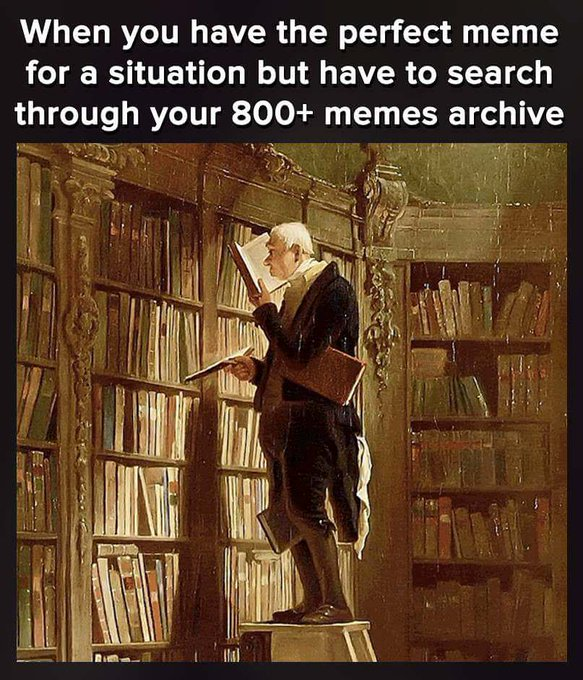

You know the problem. You have a huge folder of images: memes, screenshots, datasets, product photos, inspo albums, anything. You know that somewhere in that folder is the exact image you want, but you can't remember the filename or what day you saved it. There's nothing you can do. You have to scroll through the folder, skimming hundreds of thumbnails, hoping you don't accidentally miss it, hoping you'll recognize it when you do see it. And amazingly, humans can do this pretty well! But local image search is still pretty much a manual effort - you're still sorting through folders of images, like an archivist of old. Computers haven't made it much easier.

Until now.

The `memery` package provides natural language search over local images. You can use it to search for things like "a line drawing of a woman facing to the left" and get _reasonably good results!_ 

You can do this over thousands of images (it's not optimized for performance yet, but search times seem to scale well). 

You can view the images in a browser GUI, or pipe them through command line tools. 

You can use `memery` or its modules in Jupyter notebooks, including GUI functions! 

Under the hood, `memery` makes use of **CLIP**, the [Contrastive Language-Image Pretraining transformer](https://github.com/openai/CLIP), released by OpenAI in 2021. CLIP trains a vision transformer and a language transformer to find the same latent space for images and their captions. This makes it perfect for the purpose of natural language image search. CLIP is a giant achievement, and `memery` stands on its shoulders.



## Install

The necessary CLIP and torch packages will be installed by pip. You might want to make sure you have a sane CUDA environment before and after this step if you're trying to use GPU. If you don't have a GPU, `memery` should still work on your CPU. 

If you have any trouble please **open an issue on Github**! I want to make this package useful for as many people as possible. Help me know what's going wrong :)

`pip install memery`

If you don't have a GPU for PyTorch, this command might help
    
`pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html`


## How to use

### Use GUI

The browser GUI is a Streamlit app. You can run it from the command line with 

`memery serve`

or set up a desktop shortcut to use it from your menu.

If you're in a Jupyter environment, you can summon the GUI directly into an output cell like this:


In [ ]:
from memery.gui import appPage


In [ ]:
app = appPage()
display(app)

AppLayout(children=(Box(children=(Text(value='images/', layout=Layout(max_width='80%'), placeholder='path/to/i…

### Use CLI

From the command line, you can use `memery` on any folder and it will search for images recursively, returning a list object to stdout.

Pass the --n flag to control how many images are returned (default 10).

`memery recall PATH/TO/IMAGE/FOLDER 'query' --n 20
`

### Use as a library

Simply use `queryFlow` to search over a folder recursively! The folder will be indexed, if an index doesn't already exist. Then any new images will be CLIP-encoded, an Annoy treemap built, and a list of ranked filenames returned.

In [ ]:
from memery.core import queryFlow
from memery.gui import get_grid

In [ ]:
ranked = queryFlow('./images', 'dad joke')

print(ranked[:5])